In [11]:
from stocks_parser import StockParser
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Исходные данные

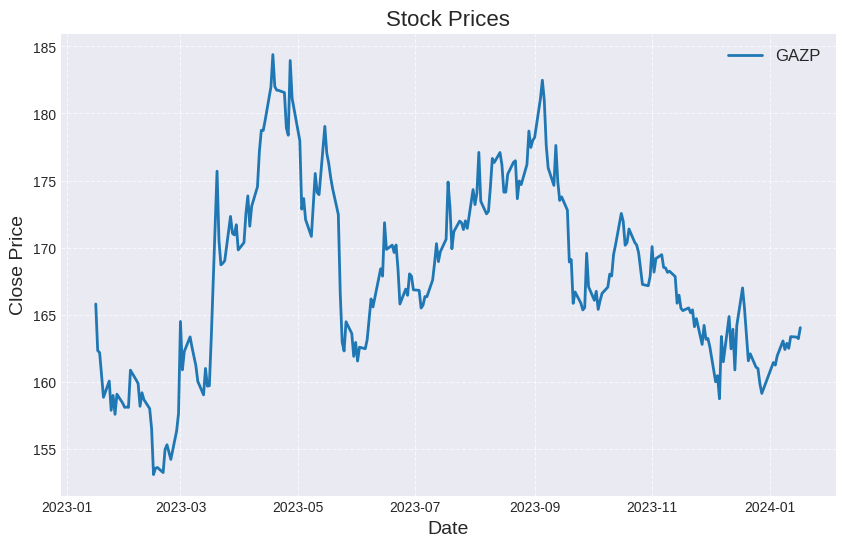

,ticker,per,date,time,open,high,low,close,vol
0,GAZP,D,2023-01-16,0,165.10,166.80,164.90,165.80,14664800
1,GAZP,D,2023-01-17,0,165.82,165.92,162.00,162.33,18054520
2,GAZP,D,2023-01-18,0,162.53,163.96,160.81,162.18,14445400
3,GAZP,D,2023-01-19,0,161.98,162.49,160.01,160.53,15603390
4,GAZP,D,2023-01-20,0,160.60,161.45,158.55,158.85,16500690
...,...,...,...,...,...,...,...,...,...
251,GAZP,D,2024-01-11,0,162.92,162.93,161.93,162.50,13085980
252,GAZP,D,2024-01-12,0,162.55,163.98,162.20,163.37,14743890
253,GAZP,D,2024-01-15,0,163.80,164.40,163.26,163.34,11051540
254,GAZP,D,2024-01-16,0,163.28,164.18,162.37,163.22,12180560


In [12]:

stock_parser = StockParser(['GAZP'],start_date = '2023-09-15', end_date = '2024-01-17')
stock_parser.parse_stocks()
stock_parser.plot_stock_data()
stock_data = stock_parser.get_stocks_dataframe()
stock_data=stock_data['GAZP']
stock_data_no_dublicates = stock_data.drop_duplicates(subset='date', keep='last')
stock_data = stock_data.sort_values('date')
stock_data

In [13]:
stock_data = stock_data.reset_index()

stock_data['increments'] = stock_data['close'].diff()
stock_data

,index,ticker,per,date,time,open,high,low,close,vol,increments
0,0,GAZP,D,2023-01-16,0,165.10,166.80,164.90,165.80,14664800,NaN
1,1,GAZP,D,2023-01-17,0,165.82,165.92,162.00,162.33,18054520,-3.47
2,2,GAZP,D,2023-01-18,0,162.53,163.96,160.81,162.18,14445400,-0.15
3,3,GAZP,D,2023-01-19,0,161.98,162.49,160.01,160.53,15603390,-1.65
4,4,GAZP,D,2023-01-20,0,160.60,161.45,158.55,158.85,16500690,-1.68
...,...,...,...,...,...,...,...,...,...,...,...
251,251,GAZP,D,2024-01-11,0,162.92,162.93,161.93,162.50,13085980,-0.37
252,252,GAZP,D,2024-01-12,0,162.55,163.98,162.20,163.37,14743890,0.87
253,253,GAZP,D,2024-01-15,0,163.80,164.40,163.26,163.34,11051540,-0.03
254,254,GAZP,D,2024-01-16,0,163.28,164.18,162.37,163.22,12180560,-0.12


 # Проверка на нормальность исходной выборки

p-value for the normal test: 1.8098777425090895e-17
Приращения не являются нормально распределенными.


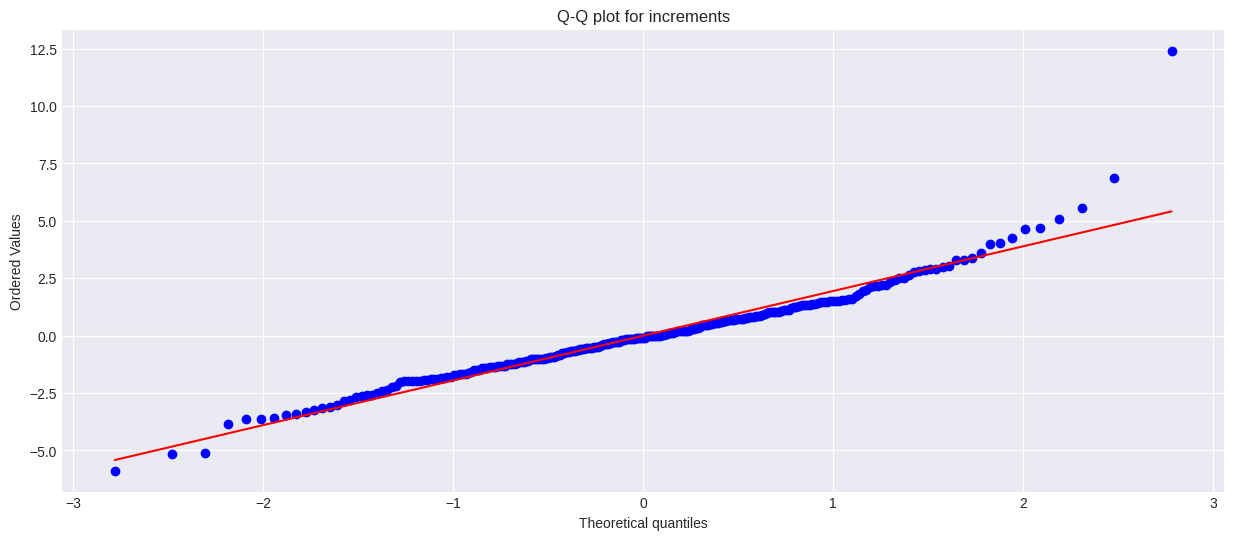

In [14]:
stock_data = stock_data.dropna()

statistic, p_value = stats.normaltest(stock_data['increments'])
print(f"p-value for the normal test: {p_value}")

if p_value > 0.05:
    print("Приращения нормально распределены.")
else:
    print("Приращения не являются нормально распределенными.")

plt.subplots(figsize=(15, 6))

stats.probplot(stock_data['increments'], dist="norm", plot=plt)
plt.title("Q-Q plot for increments")
plt.show()

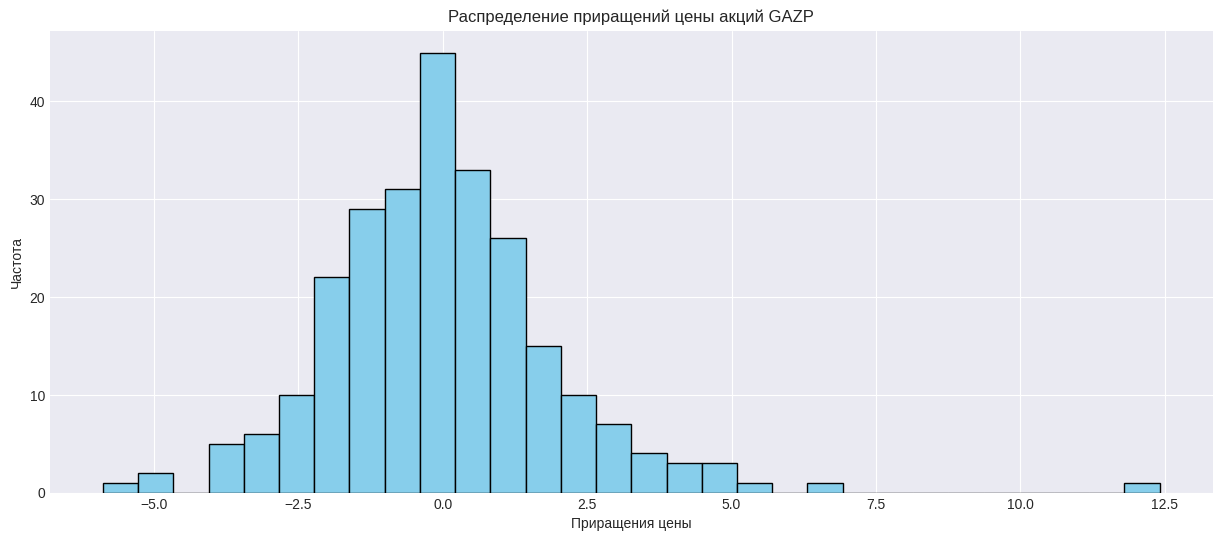

In [15]:
plt.subplots(figsize=(15, 6))
plt.hist(stock_data['increments'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение приращений цены акций GAZP')
plt.xlabel('Приращения цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Нормальность после удаления выбросов

p-value for the normal test after outlier removal: 0.7159625704019109
Приращения нормально распределены после удаления выбросов.


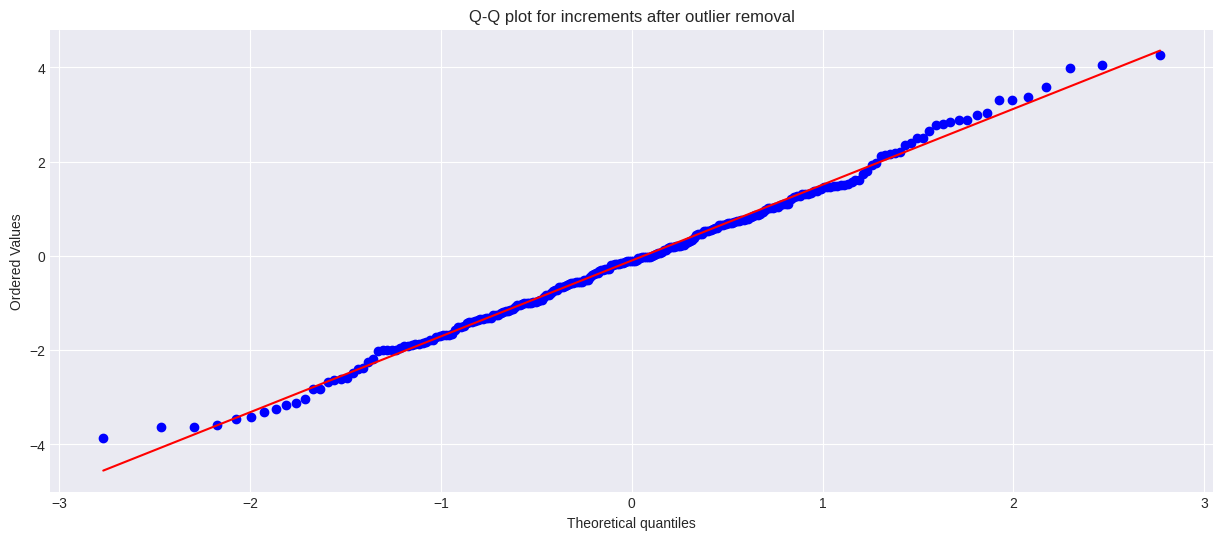

In [16]:

Q1 = stock_data['increments'].quantile(0.25)
Q3 = stock_data['increments'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_data = stock_data[(stock_data['increments'] >= lower_bound) & (stock_data['increments'] <= upper_bound)]


statistic, p_value = stats.normaltest(filtered_data['increments'])
print(f"p-value for the normal test after outlier removal: {p_value}")


if p_value > 0.05:
    print("Приращения нормально распределены после удаления выбросов.")
else:
    print("Приращения не являются нормально распределенными после удаления выбросов.")

plt.subplots(figsize=(15, 6))
stats.probplot(filtered_data['increments'], dist="norm", plot=plt)
plt.title("Q-Q plot for increments after outlier removal")
plt.show()

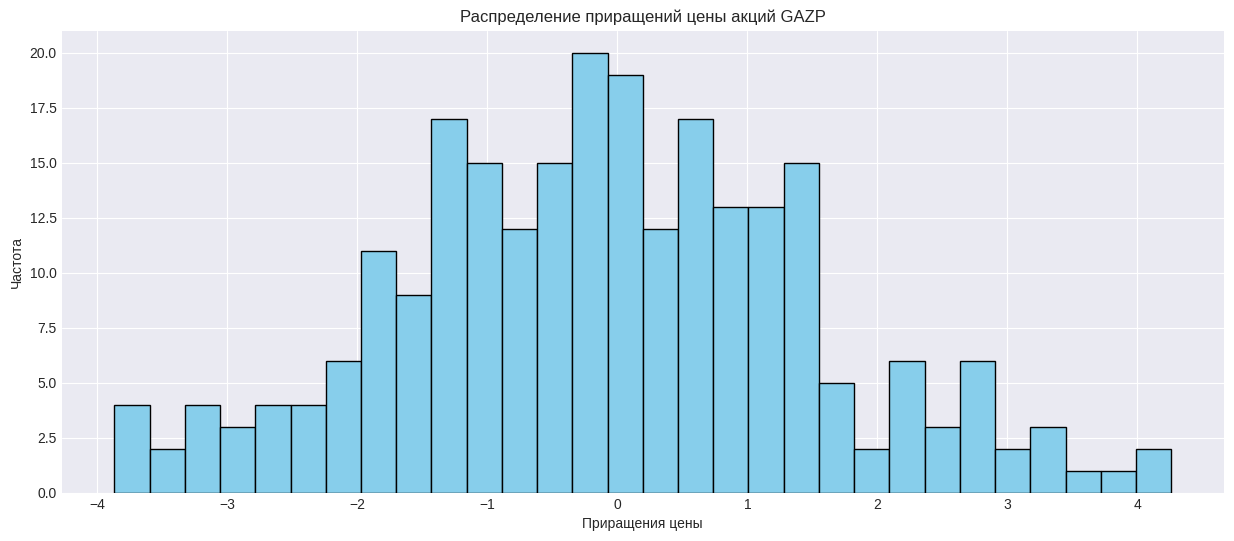

In [17]:
plt.subplots(figsize=(15, 6))
plt.hist(filtered_data['increments'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение приращений цены акций GAZP')
plt.xlabel('Приращения цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Доверительный интервал для среднего приращений с доверительным уровнем 95.0%: (-0.3011619127164873, 0.0989667907652675)


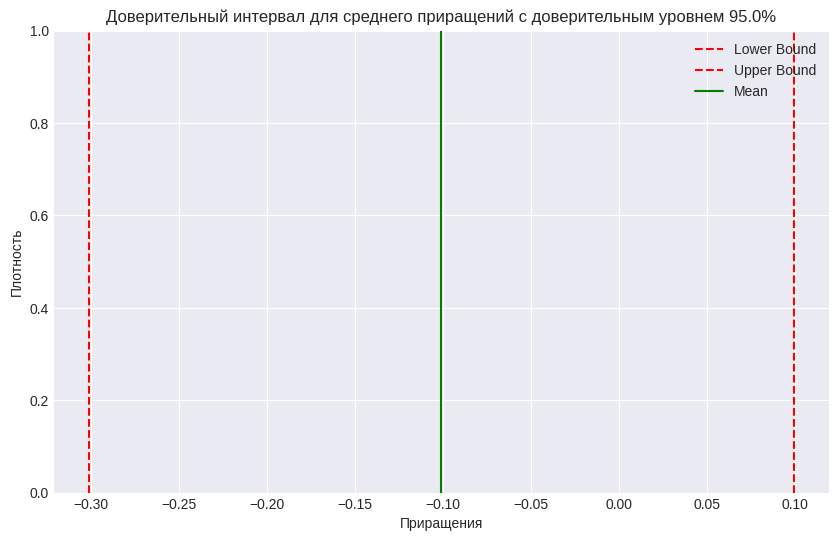

In [18]:

# Вычисление параметров нормального распределения
mean_increments = filtered_data['increments'].mean()
std_dev_increments = filtered_data['increments'].std()
n_samples = len(filtered_data['increments'])

# Уровень доверия
confidence_level = 0.95

# Доверительный интервал для среднего
z_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_value * (std_dev_increments / np.sqrt(n_samples))
confidence_interval = (mean_increments - margin_of_error, mean_increments + margin_of_error)

print(f"Доверительный интервал для среднего приращений с доверительным уровнем {confidence_level * 100}%: {confidence_interval}")

# Визуализация доверительного интервала
plt.figure(figsize=(10, 6))
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='Lower Bound')
plt.axvline(x=confidence_interval[1], color='red', linestyle='--', label='Upper Bound')
plt.axvline(x=mean_increments, color='green', linestyle='-', label='Mean')
plt.title(f'Доверительный интервал для среднего приращений с доверительным уровнем {confidence_level * 100}%')
plt.xlabel('Приращения')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()


# Проверка на Логнормальное распределение

/tmp/ipykernel_9587/398398639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['log_close'] = np.log(stock_data['close'])


p-value for the log-normal test: 0.03531978368485846
Данные не являются логнормально распределенными.


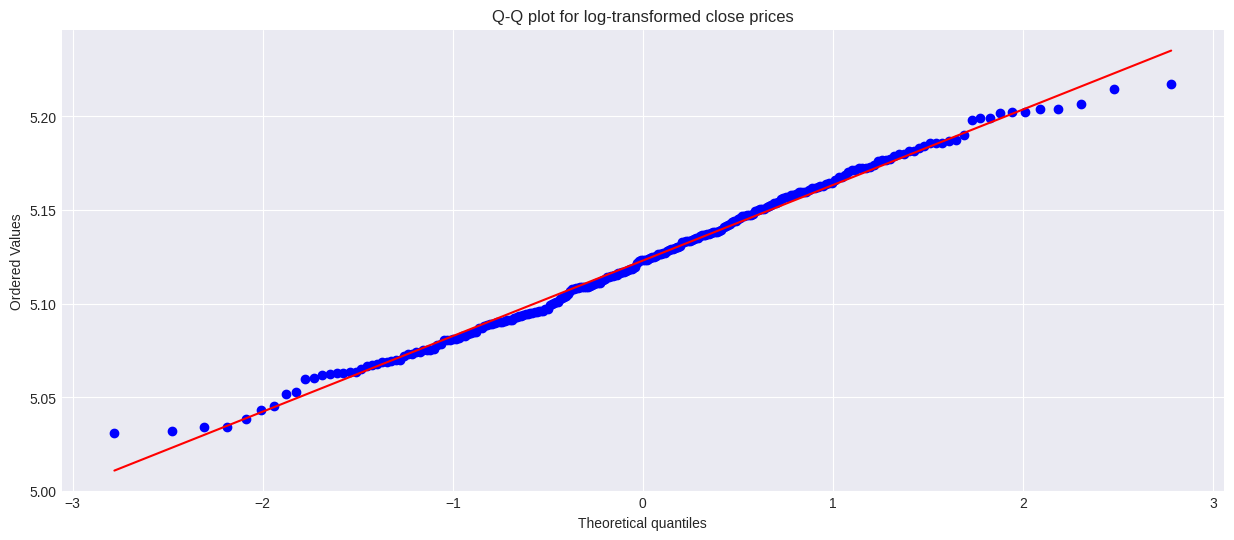

In [19]:
stock_data['log_close'] = np.log(stock_data['close'])


statistic, p_value = stats.normaltest(stock_data['log_close'])
print(f"p-value for the log-normal test: {p_value}")


if p_value > 0.05:
    print("Логнормальное распределение подтверждено.")
else:
    print("Данные не являются логнормально распределенными.")

plt.subplots(figsize=(15, 6))
stats.probplot(stock_data['log_close'], dist="norm", plot=plt)
plt.title("Q-Q plot for log-transformed close prices")
plt.show()

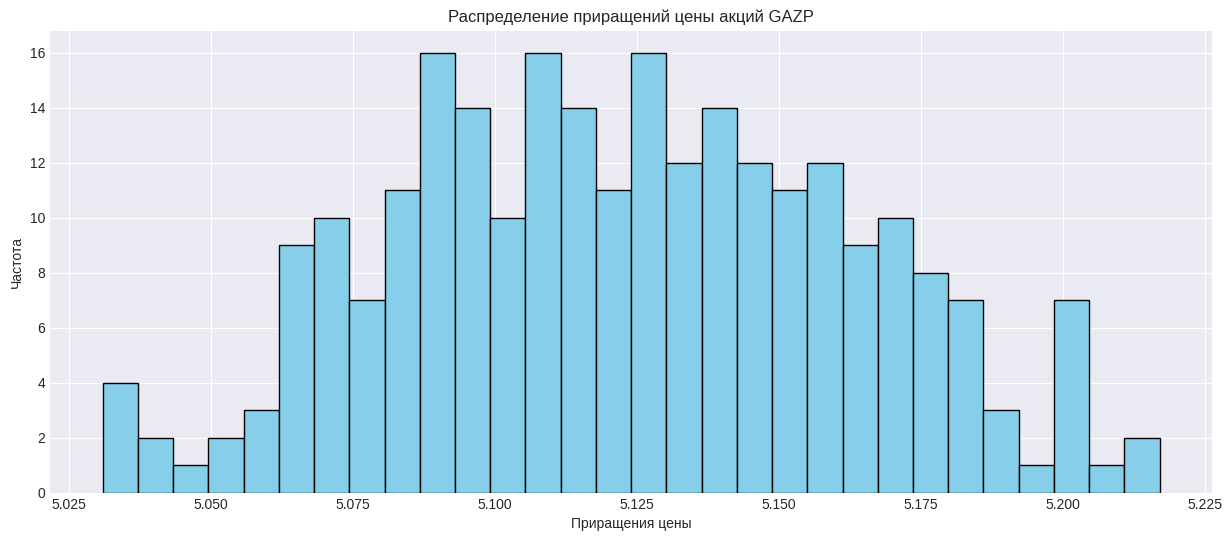

In [20]:
plt.subplots(figsize=(15, 6))
plt.hist(stock_data['log_close'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение приращений цены акций GAZP')
plt.xlabel('Приращения цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()